In [78]:
# Importar librerias

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [79]:
#Cargamos el dataset

df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
df.shape

(891, 12)

In [81]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Detección de faltantes y valores atípicos')

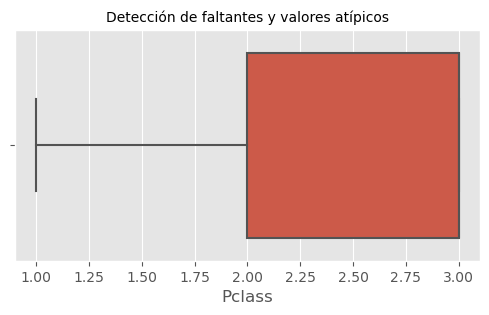

In [82]:
#Deteccion de faltantes y valores atípicos

plt.figure(figsize= (6,3))
sb.boxplot(x=df['Pclass'])
plt.title('Detección de faltantes y valores atípicos', fontsize=10)

Text(0.5, 1.0, 'Detección de faltantes y valores atípicos')

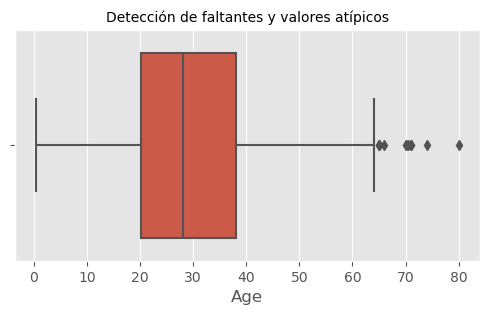

In [83]:
#Deteccion de faltantes y valores atípicos

plt.figure(figsize= (6,3))
sb.boxplot(x=df['Age'])
plt.title('Detección de faltantes y valores atípicos', fontsize=10)

In [84]:
#Validacion de los datos

print("Cantidad de registros con cero en Survived: ", df['Survived'].isin([0]).sum())
print("Cantidad de registros con cero en Pclass: ", df['Pclass'].isin([0]).sum())
print("Cantidad de registros con cero en Age: ",  df['Age'].isin([0]).sum())
print("Cantidad de registros con cero en PSibSp: ",  df['SibSp'].isin([0]).sum())

Cantidad de registros con cero en Survived:  549
Cantidad de registros con cero en Pclass:  0
Cantidad de registros con cero en Age:  0
Cantidad de registros con cero en PSibSp:  608


In [85]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [86]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
print("valores perdidos en Age: " + 
      str(df['Age'].isnull().sum()))

valores perdidos en Age: 0


In [87]:
# Imputamos la variable num-of-doors con la moda

df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)
print("Valores perdidos en Cabin: " + 
      str(df['Cabin'].isnull().sum()))

Valores perdidos en Cabin: 0


In [88]:
# Imputamos la variable num-of-doors con la moda

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
print("Valores perdidos en Embarked: " + 
      str(df['Embarked'].isnull().sum()))

Valores perdidos en Embarked: 0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [90]:
x=np.array(df[['Survived']])
# x= df[['Survived'].values
y= df[['Age']].values


In [91]:
# Creamos el objeto de Regresión Linear

regr = linear_model.LinearRegression()
regr.fit(x,y)

LinearRegression()

In [92]:
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coeficiente de regresion: ', regr.coef_)

Coeficiente de regresion:  [[-1.86532152]]


In [93]:
# Este es el valor donde corta el eje Y (en X=0)
print('Interceptacion: ', regr.intercept_)

Interceptacion:  [30.41509965]


In [94]:
print (f"La ecuación de la recta es:  y= {regr.intercept_} + {regr.coef_[0]}*x")
#print (f”La ecuación de la recta es:  y= {modelo.intercept_} + {modelo.coef_[0]}”x”)

La ecuación de la recta es:  y= [30.41509965] + [-1.86532152]*x


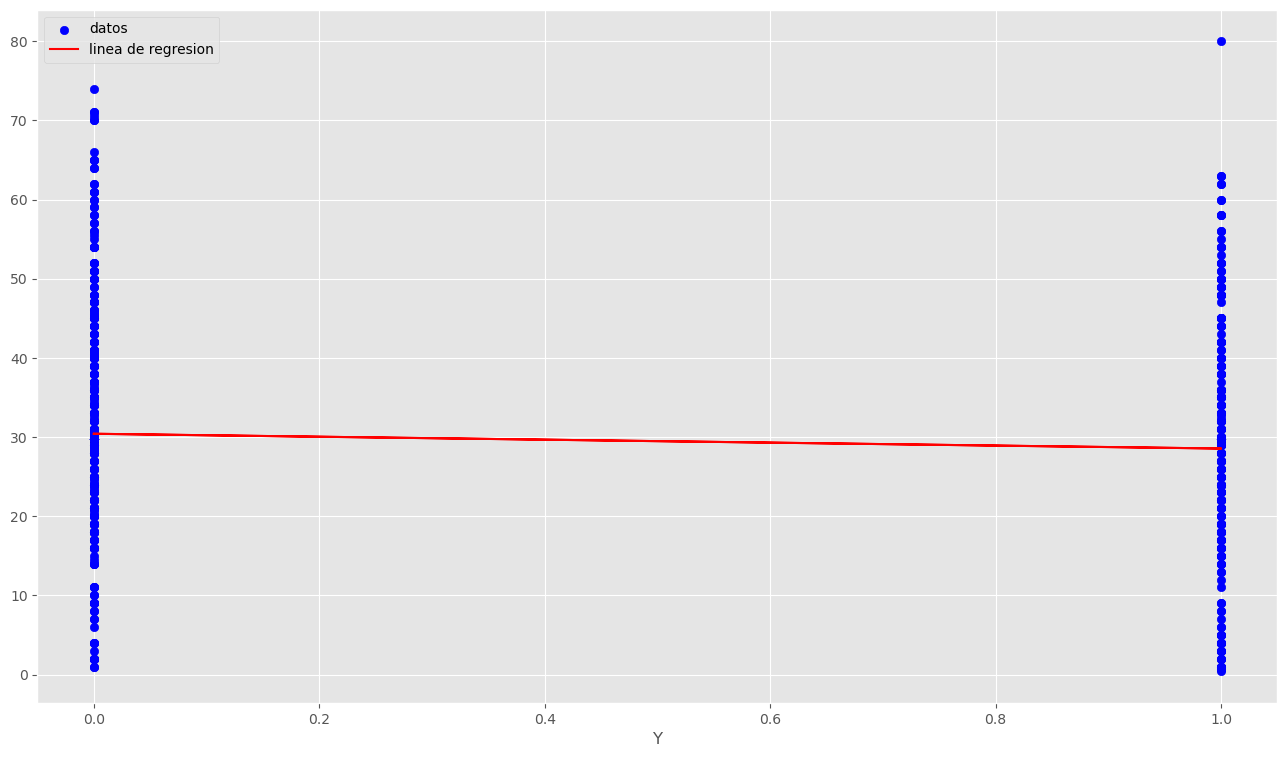

In [95]:
plt.scatter(x, y, color='blue', label='datos')
plt.plot(x, regr.predict (x), color='red', label='linea de regresion') 
plt.style.use('ggplot')
plt.xlabel('X')
plt.xlabel('Y')
plt.legend()
plt.show()

In [96]:
y_pred = regr.predict (x)
mse = mean_squared_error(y,  y_pred)
rmse=np.sqrt(mse)
mae= mean_absolute_error(y,  y_pred)
rs=r2_score(y,  y_pred)

In [97]:
print()
print(f"El error cuadrático medio (MSE )es: {mse}")
print()
print(f"Raiz del error cuadrático medio (RMSE )es: {rmse}")
print()
print(f"Error absoluto medio (MAE )es: {mae}")
print()
print(f"Coeficiente de determinación (R2 )es: {rs}")


El error cuadrático medio (MSE )es: 168.0397601926951

Raiz del error cuadrático medio (RMSE )es: 12.963015088809204

Error absoluto medio (MAE )es: 9.260525535401612

Coeficiente de determinación (R2 )es: 0.004873228806595242
